In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns


In [2]:
#import json file to dataframe
with open('ultimate_data_challenge.json', 'r') as datafile:
    data = json.load(datafile)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [4]:
#check phone column for null values
df['phone'].describe()

count      49604
unique         2
top       iPhone
freq       34582
Name: phone, dtype: object

In [5]:
#replace phone column null values with string 'other'
df['phone'].fillna('other', inplace = True)
df['phone'].describe()

count      50000
unique         3
top       iPhone
freq       34582
Name: phone, dtype: object

In [6]:
#check city column for null values
#none found, no cleaning needed
df['city'].describe()

count          50000
unique             3
top       Winterfell
freq           23336
Name: city, dtype: object

In [7]:
#replace NANs in avg_rating_by_driver, avg_rating_of_driver
#replace with mean
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace = True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace = True)
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


The y-variable for training a model, whether or not a user is retained, can be found from last_trip_date. A new column can be created with binary values for if the user was retained. 

In [10]:
#create new column - if rider was retained
#convert date columns to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [12]:
#find the latest date to find what the last 30 days means
#count user as retained if they took a trip in June
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [13]:
df['retained'] = df['last_trip_date'] > '2014-06-01 00:00:00'

In [14]:
df['retained'].head()

0     True
1    False
2    False
3     True
4    False
Name: retained, dtype: bool

In [15]:
df['retained'].describe()

count     50000
unique        2
top       False
freq      31690
Name: retained, dtype: object

In [16]:
#count number of riders who were retained
np.sum(df['retained'])

18310

In [17]:
#get percent retained:
print('{:0.2f} percent of riders were retained'.format(np.sum(df['retained'])/df['retained'].count() * 100))

36.62 percent of riders were retained


From this initial analysis, we can see that a little over a third of users were retained, or active in the last month.

Next I will visualize the data to see if there are any insights that could be helpful before creating a model to classify if a rider is retained or not. 

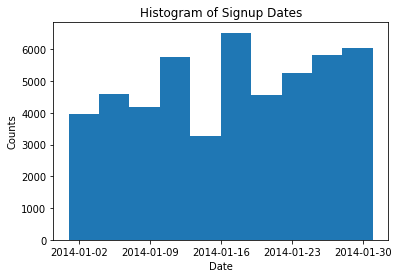

In [19]:
plt.hist(df['signup_date'])
plt.title('Histogram of Signup Dates')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()

The number of signups gradually increased, with two notable peaks.

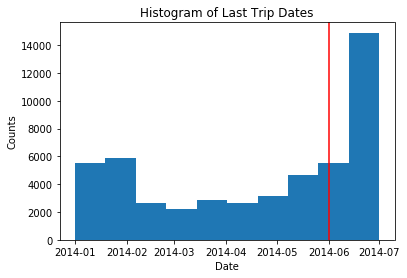

In [20]:
plt.hist(df['last_trip_date'])
plt.title('Histogram of Last Trip Dates')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.axvline('2014-06', color = 'red')
plt.show()

All last trip dates to the right of the red line are by customers who can be considered retained. This graph shows an initial drop off of users in the first month, followed by a slower and constant drop off over the next 5 months. Even though only approximately 1/3 of the users are retained, it makes sense that the final bin on the histogram is the largest because almost all of the retained users fall into this bin.

Next, I plotted all of the numberical data against the last trip date to see if there are correlations. I used seaborn lmplot to add best fit lines and printed the pearson r coefficient for each pair of data below the graph. The colors represent the retained status of the user. 

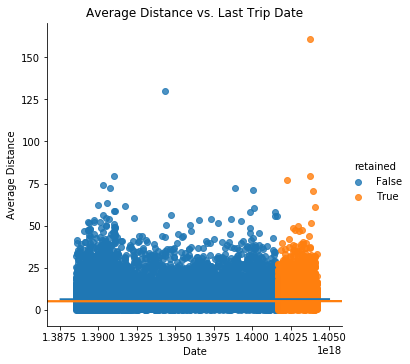

Pearson r = -0.108


In [44]:
from scipy.stats import pearsonr
#convert the trip date to numeric so that seaborn can plot it
df['last_trip_date'] = pd.to_numeric(df['last_trip_date'], downcast='float')
sns.lmplot(x="last_trip_date", y="avg_dist", data=df, hue = "retained")
plt.title('Average Distance vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Average Distance')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['avg_dist'])[0]))

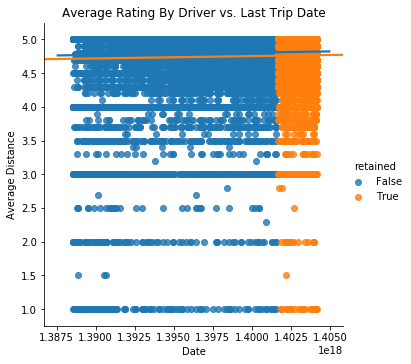

Pearson r = -0.033


In [22]:
sns.lmplot(x="last_trip_date", y="avg_rating_by_driver", data=df, hue = "retained")
plt.title('Average Rating By Driver vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Average Distance')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['avg_rating_by_driver'])[0]))

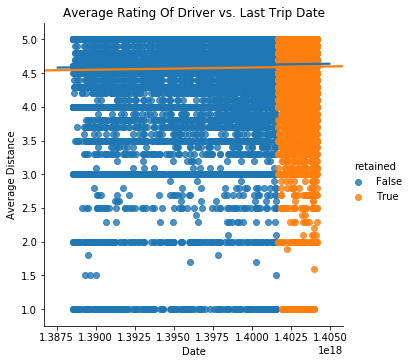

Pearson r = -0.014


In [23]:
sns.lmplot(x="last_trip_date", y="avg_rating_of_driver", data=df, hue = "retained")
plt.title('Average Rating Of Driver vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Average Distance')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['avg_rating_of_driver'])[0]))

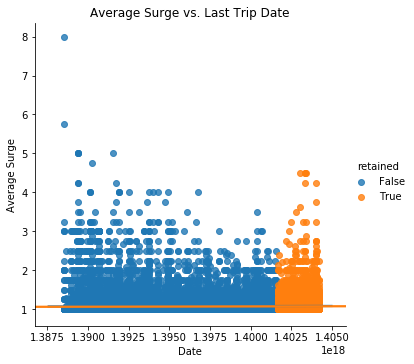

Pearson r = -0.018


In [24]:
sns.lmplot(x="last_trip_date", y="avg_surge", data=df, hue = "retained")
plt.title('Average Surge vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Average Surge')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['avg_surge'])[0]))

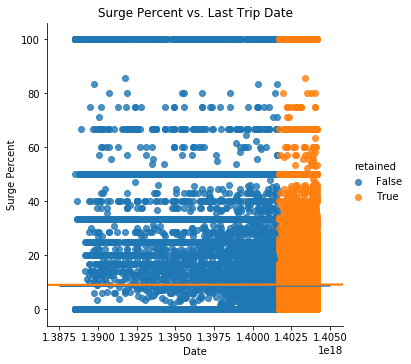

Pearson r = 0.004


In [25]:
sns.lmplot(x="last_trip_date", y="surge_pct", data=df, hue = "retained")
plt.title('Surge Percent vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Surge Percent')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['surge_pct'])[0]))

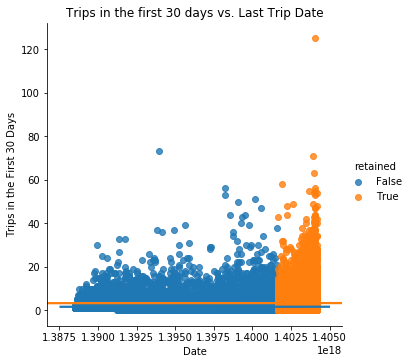

Pearson r = 0.168


In [26]:
sns.lmplot(x="last_trip_date", y="trips_in_first_30_days", data=df, hue = "retained")
plt.title('Trips in the first 30 days vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Trips in the First 30 Days')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['trips_in_first_30_days'])[0]))

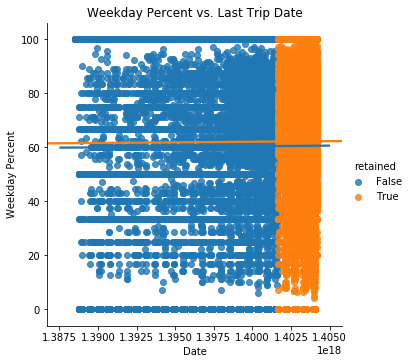

Pearson r = 0.022


In [45]:
sns.lmplot(x="last_trip_date", y="weekday_pct", data=df, hue = "retained")
plt.title('Weekday Percent vs. Last Trip Date')
plt.xlabel('Date')
plt.ylabel('Weekday Percent')
plt.show()

print('Pearson r = {:.3f}'.format(pearsonr(df['last_trip_date'], df['weekday_pct'])[0]))

After plotting all of the numerical data against the last trip date, there are no clear correlations. The largest pearson r coefficient is 0.168, which does not represent a notable correlation. Visually, a few of the plots, like surge percent vs last trip date, hint at a pattern, but it is not strong. 

Next, the categorical data, phone type and city, will be visualized

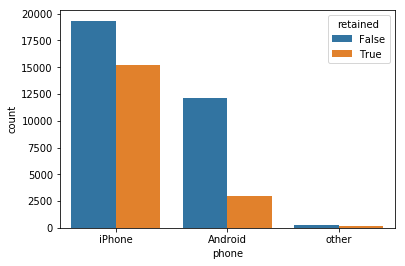

In [29]:
sns.countplot(x='phone', data = df, hue = 'retained')
plt.title('Phone Brand for Retained vs Not Retained Customers')
plt.xlabel('Phone Brand')
plt.ylabel('Counts')
plt.show()

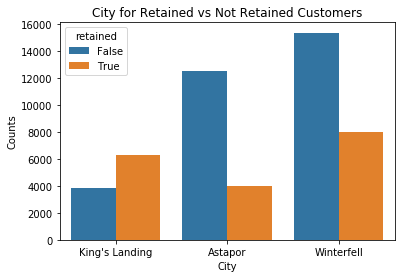

In [30]:
sns.countplot(x='city', data = df, hue = 'retained')
plt.title('City for Retained vs Not Retained Customers')
plt.xlabel('City')
plt.ylabel('Counts')
plt.show()

These two plots show that there is a much more significant correlation between these two pieces of categorical data and the retained status of the customers. IPhone users seem more linely to be retained, and King's Landing is the only city which has more retained users than not retained users.

Now I am ready to begin modelling. First I will import all necessary modules and define a method for graphing confusion matrices. The code for the method is taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

I will try three models with the data, KNearestNeighbors, SVM, and a random forest classifier. The hyperperameters for each will be chosen with a grid search using cross validation. Each model will use scaled data, using the StandardScaler from Scikit-Learn. Finally, the metrics used will be accuracy, area under the ROC curve (AUC), and a confusion matrix. The accuracy and AUC were chosen for being two different measurements of performance that provide a single number and area easy to compare. The confusion matrix was chosen to show each model's frequency of false positives and false negatives.

In [28]:

from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [29]:
#separate data
y = df['retained']
X = df.drop(columns=['retained','last_trip_date'])
X['signup_date'] = pd.to_numeric(X['signup_date'], downcast='float')
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,1.390608e+18,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,Android,1.390954e+18,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,1.388966e+18,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,1.389312e+18,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,1.390781e+18,11.8,14,False,82.4


In [30]:
from sklearn.preprocessing import LabelEncoder
#convert strings to ints for the model

lePhone = LabelEncoder()
lePhone.fit(X['phone'])
X['phone'] = lePhone.transform(X['phone'])
X['phone'].head()

0    1
1    0
2    1
3    1
4    0
Name: phone, dtype: int64

In [31]:
leCity = LabelEncoder()
leCity.fit(X['city'])
X['city'] = leCity.transform(X['city'])
X['city'].head()

0    1
1    0
2    0
3    1
4    2
Name: city, dtype: int64

In [34]:
#import training modules

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler


In [35]:
#create train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3791)

In [41]:
#scale using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

/home/maia/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/maia/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/maia/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/maia/anaconda3/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/maia/anaconda3/lib/python3.5/s

In [35]:
#grid search cv for number of neighbors in KNN

parameters = {'n_neighbors':np.arange(1,50)}
neighbors = KNeighborsClassifier(n_neighbors=1)
clf = GridSearchCV(neighbors, parameters, cv=5)
clf.fit(X_scaled, y)
print(clf.best_params_)

{'n_neighbors': 15}


In [47]:
#train KNN with scaled data
neighbors = KNeighborsClassifier(n_neighbors=15)
neighbors.fit(X_trainScaled, y_train)
y_pred = neighbors.predict(X_testScaled)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy score: 0.764
AUC: 0.733


Normalized confusion matrix
[[0.83 0.17]
 [0.47 0.53]]


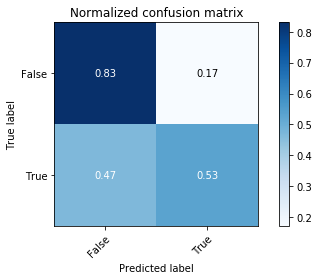

In [52]:
np.set_printoptions(precision=2)

class_names = [False, True]
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [52]:
#train and test an SVM
clf = SVC(gamma='auto')
clf.fit(X_trainScaled, y_train)
y_pred = clf.predict(X_testScaled)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy score: 0.780
AUC: 0.740


Normalized confusion matrix
[[0.87 0.13]
 [0.34 0.66]]


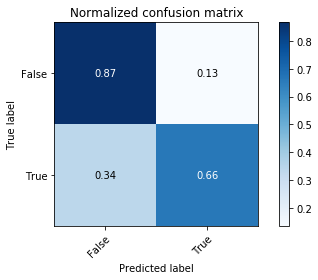

In [50]:
np.set_printoptions(precision=2)

class_names = [False, True]
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [38]:
#perform grid search for best parameters for random forest
parameters = {'n_estimators':np.arange(180,350,10), 'max_depth':np.arange(1,20)}
randomForest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 3791)
clf = GridSearchCV(randomForest, parameters, cv=5)
clf.fit(X, y)
print(clf.best_params_)

{'max_depth': 13, 'n_estimators': 270}


In [53]:
#train and test random forest
randomForest = RandomForestClassifier(n_estimators=270, max_depth=13, random_state = 3791)
randomForest.fit(X_trainScaled,y_train)
y_pred = randomForest.predict(X_testScaled)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy score: 0.792
AUC: 0.764


Normalized confusion matrix
[[0.87 0.13]
 [0.34 0.66]]


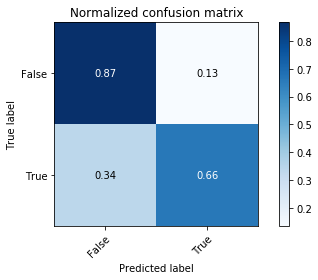

In [51]:
np.set_printoptions(precision=2)

class_names = [False, True]
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Based on all of the metrics used, the random forest classifier performed the best on this data, followed by the SVM and then the KNearestNeighbors . All three of the models gave significantly more false negatives than false positives. This would need to be taken into account when using this model for business. 

From the exploratory data analysis, I would recommend that more outreach and promotions be extended to users in Astapor City and Winterfell than King's Landing and further investigation be done into difference of usage between the cities. There is potential that the Android interface is not as good as the iPhone interface as well, and this should be investigated to improve retention. 

